In [ ]:
pip install ucimlrepo

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [ ]:
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

In [ ]:
# fetch dataset
breast_cancer_wisconsin_original = fetch_ucirepo(id=15)

# data (as pandas dataframes)
x = breast_cancer_wisconsin_original.data.features
y = breast_cancer_wisconsin_original.data.targets

# metadata
print(breast_cancer_wisconsin_original.metadata)

# variable information
print(breast_cancer_wisconsin_original.variables)


{'uci_id': 15, 'name': 'Breast Cancer Wisconsin (Original)', 'repository_url': 'https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original', 'data_url': 'https://archive.ics.uci.edu/static/public/15/data.csv', 'abstract': 'Original Wisconsin Breast Cancer Database', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 699, 'num_features': 9, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['Class'], 'index_col': ['Sample_code_number'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1990, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C5HP4Z', 'creators': ['WIlliam Wolberg'], 'intro_paper': None, 'additional_info': {'summary': "Samples arrive periodically as Dr. Wolberg reports his clinical cases. The database therefore reflects this chronological grouping of the data. This grouping information appears immediately below, having been removed fro

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'

column_names = [
    'Sample code number', 'Clump Thickness', 'Uniformity of Cell Size',
    'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size',
    'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class'
]

df = pd.read_csv(url, header=None, names=column_names)


# **Data Understanding**

In [ ]:
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_thickness              699 non-null    int64  
 1   Uniformity_of_cell_size      699 non-null    int64  
 2   Uniformity_of_cell_shape     699 non-null    int64  
 3   Marginal_adhesion            699 non-null    int64  
 4   Single_epithelial_cell_size  699 non-null    int64  
 5   Bare_nuclei                  683 non-null    float64
 6   Bland_chromatin              699 non-null    int64  
 7   Normal_nucleoli              699 non-null    int64  
 8   Mitoses                      699 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 49.3 KB


In [ ]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Class   699 non-null    int64
dtypes: int64(1)
memory usage: 5.6 KB


In [ ]:
df = pd.concat([x, y], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_thickness              699 non-null    int64  
 1   Uniformity_of_cell_size      699 non-null    int64  
 2   Uniformity_of_cell_shape     699 non-null    int64  
 3   Marginal_adhesion            699 non-null    int64  
 4   Single_epithelial_cell_size  699 non-null    int64  
 5   Bare_nuclei                  683 non-null    float64
 6   Bland_chromatin              699 non-null    int64  
 7   Normal_nucleoli              699 non-null    int64  
 8   Mitoses                      699 non-null    int64  
 9   Class                        699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.7 KB


In [ ]:
df.describe()

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [ ]:
df.isna().sum()

Clump_thickness                 0
Uniformity_of_cell_size         0
Uniformity_of_cell_shape        0
Marginal_adhesion               0
Single_epithelial_cell_size     0
Bare_nuclei                    16
Bland_chromatin                 0
Normal_nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [ ]:
df.columns

Index(['Clump_thickness', 'Uniformity_of_cell_size',
       'Uniformity_of_cell_shape', 'Marginal_adhesion',
       'Single_epithelial_cell_size', 'Bare_nuclei', 'Bland_chromatin',
       'Normal_nucleoli', 'Mitoses', 'Class'],
      dtype='object')

# **Data Cleansing & Data Transformation**
1. Mengganti NaN value pada kolom 'Bare Nuclei' dengan rata-rata dari 'Bare Nuclei'
2. Mengubah tipe data Bare Nuklei menjadi numerik




In [ ]:
df['Bare_nuclei'].replace('?', pd.NA, inplace=True)

In [ ]:
mean = df['Bare_nuclei'].mean()
print(mean)
df['Bare_nuclei'] = df['Bare_nuclei'].fillna(mean)

3.5446559297218156


In [ ]:
df['Bare_nuclei'] = pd.to_numeric(df['Bare_nuclei'], errors='coerce')

# **Data Visualization**


In [ ]:
numerical_column = df[['Clump_thickness', 'Uniformity_of_cell_size',
       'Uniformity_of_cell_shape', 'Marginal_adhesion',
       'Single_epithelial_cell_size', 'Bare_nuclei', 'Bland_chromatin',
       'Normal_nucleoli', 'Mitoses', 'Class']]

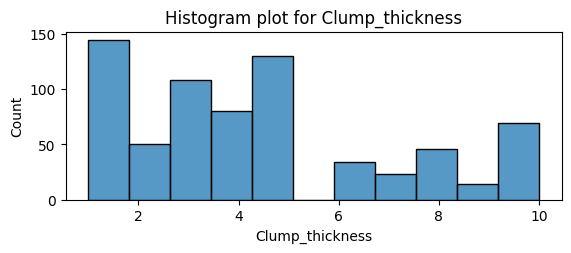

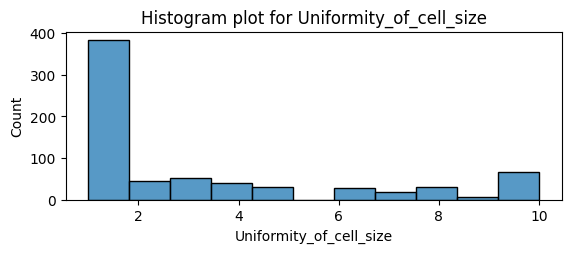

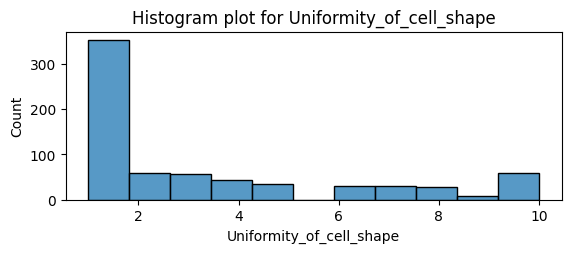

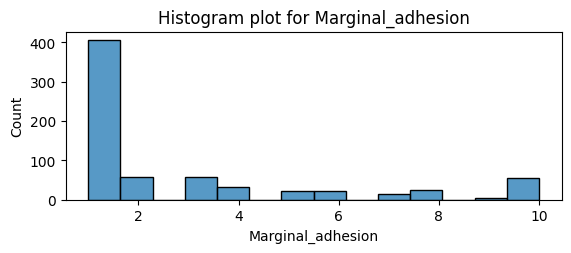

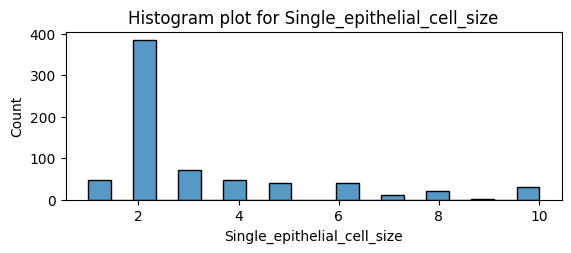

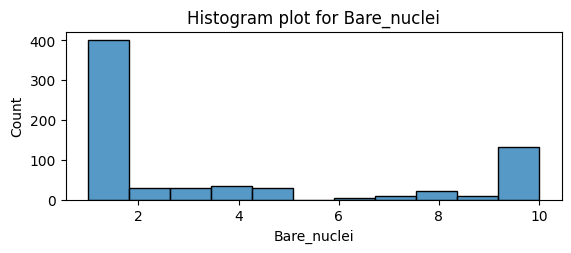

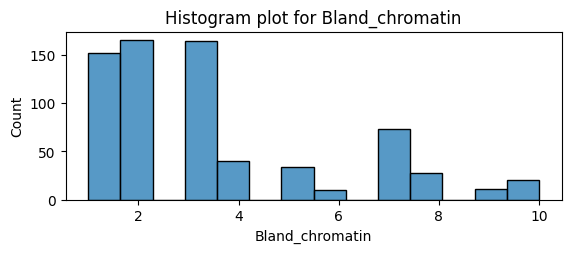

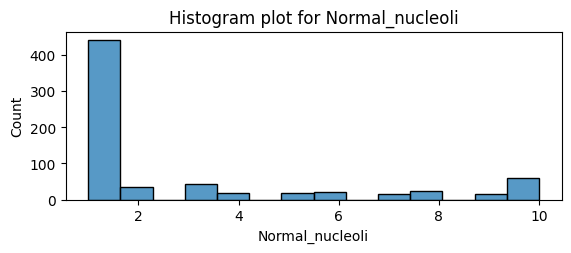

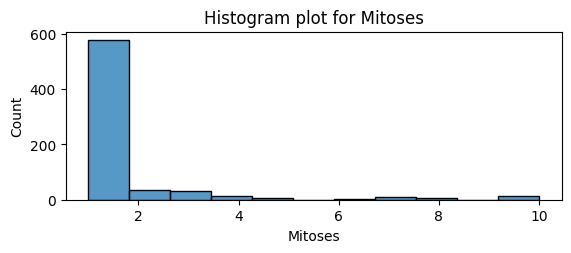

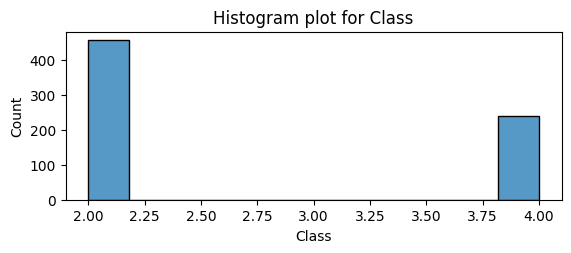

In [ ]:
#Visualisasi histogram
for col in numerical_column:
  plt.subplot(2,1,1)
  sns.histplot(numerical_column[col])
  plt.title(f"Histogram plot for {col}")
  plt.show()

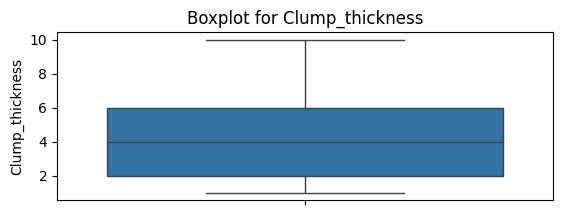

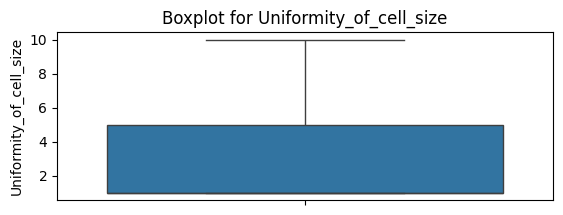

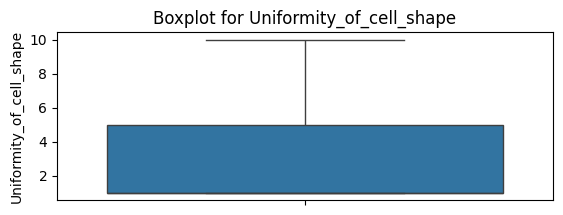

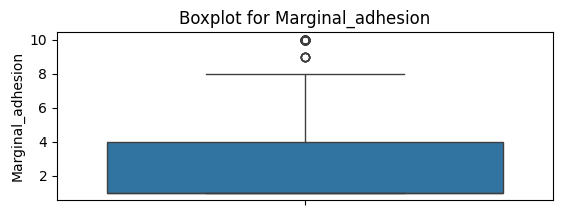

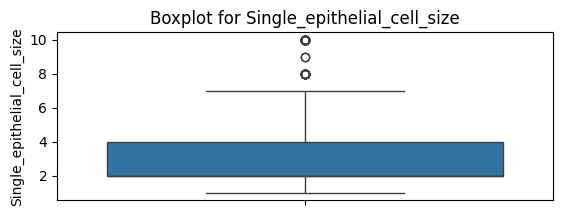

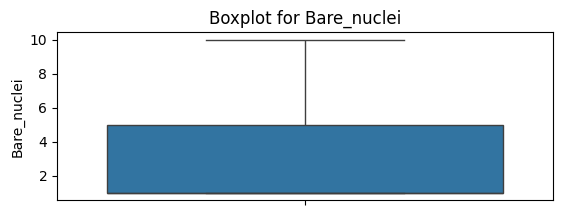

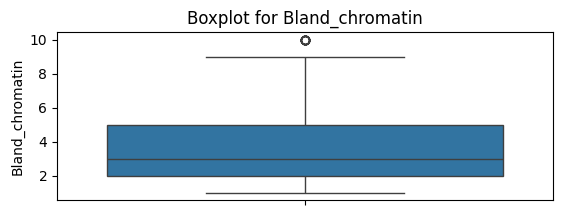

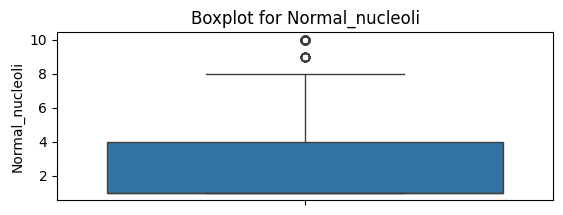

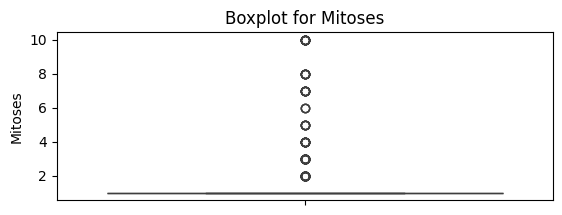

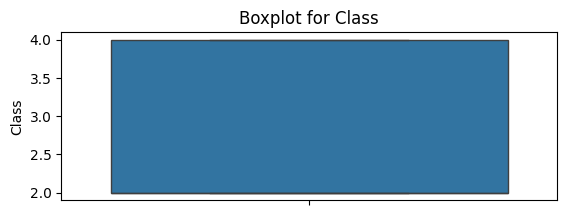

In [ ]:
for col in numerical_column:
  plt.subplot(2,1,1)
  sns.boxplot(numerical_column[col])
  plt.title(f"Boxplot for {col}")
  plt.show()

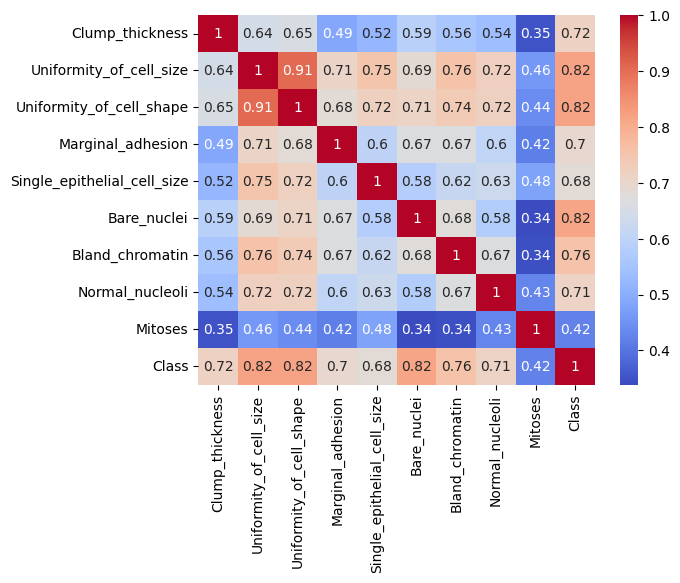

In [ ]:
#Visualisasi matrix korelasi
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.show()

**Feature Scaling**
Mentransformasikan nilai-nilai dari fitur-fitur dalam dataset ke skala yang sama.

In [ ]:
features = df.drop(['Class'], axis=1)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [ ]:
# Create DataFrame with scaled features
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)
scaled_df['Class'] = df['Class']

# **Logic Regression Model**
Logistic regression is a process of modeling the probability of a discrete outcome given an input variable.

In [ ]:
x = scaled_df.drop('Class', axis=1)
y = scaled_df['Class']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

              precision    recall  f1-score   support

           2       0.96      0.99      0.97        95
           4       0.98      0.91      0.94        45

    accuracy                           0.96       140
   macro avg       0.97      0.95      0.96       140
weighted avg       0.96      0.96      0.96       140



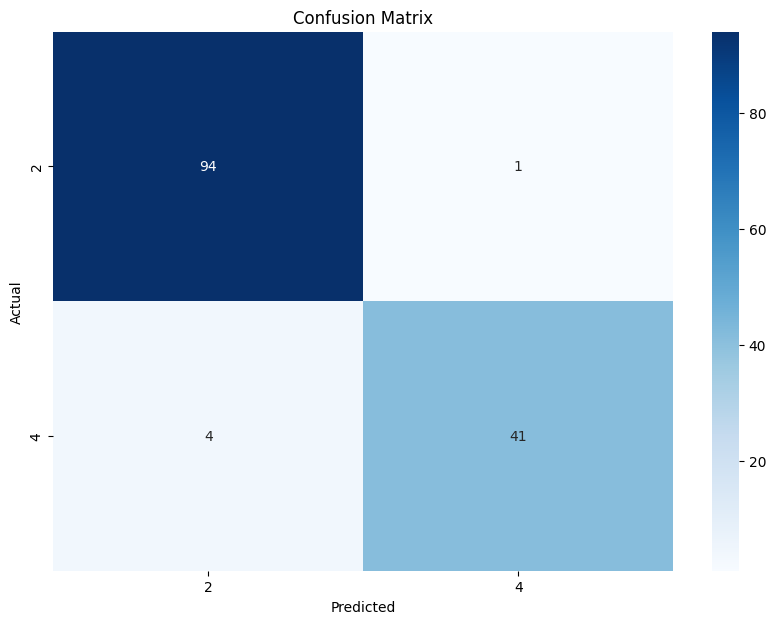

In [ ]:
# Train a Logistic Regression model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

dt = LogisticRegression()
dt.fit(x_train, y_train)
dt_pred = dt.predict(x_test)

# Generate and print the classification report
report = classification_report(y_test, dt_pred)
print(report)

# Visualize the confusion matrix using seaborn
dt_cm = confusion_matrix(y_test, dt_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Blues', xticklabels=dt.classes_, yticklabels=dt.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# **KNN Model**


Classification Report: 
              precision    recall  f1-score   support

           2       0.97      0.99      0.98        95
           4       0.98      0.93      0.95        45

    accuracy                           0.97       140
   macro avg       0.97      0.96      0.97       140
weighted avg       0.97      0.97      0.97       140



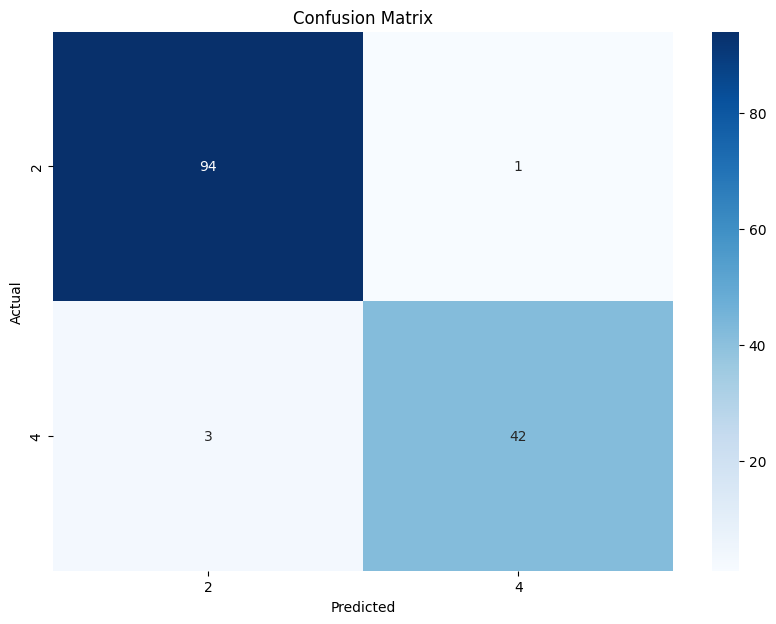

In [ ]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Instantiate the KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

# Predict the labels on the test set
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

# Calculate accuracy score for both training and test sets
knn_train_acc = accuracy_score(y_train, y_pred_train)
knn_test_acc = accuracy_score(y_test, y_pred_test)

# Generate and print the classification report
class_report = classification_report(y_test, y_pred_test)
print(f"Classification Report: \n{class_report}")

# Visualize the confusion matrix using seaborn
knn_cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(10, 7))
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Blues', xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# **Random Forest Classifier**

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Classification Report: 
              precision    recall  f1-score   support

           2       0.97      0.99      0.98        95
           4       0.98      0.93      0.95        45

    accuracy                           0.97       140
   macro avg       0.97      0.96      0.97       140
weighted avg       0.97      0.97      0.97       140



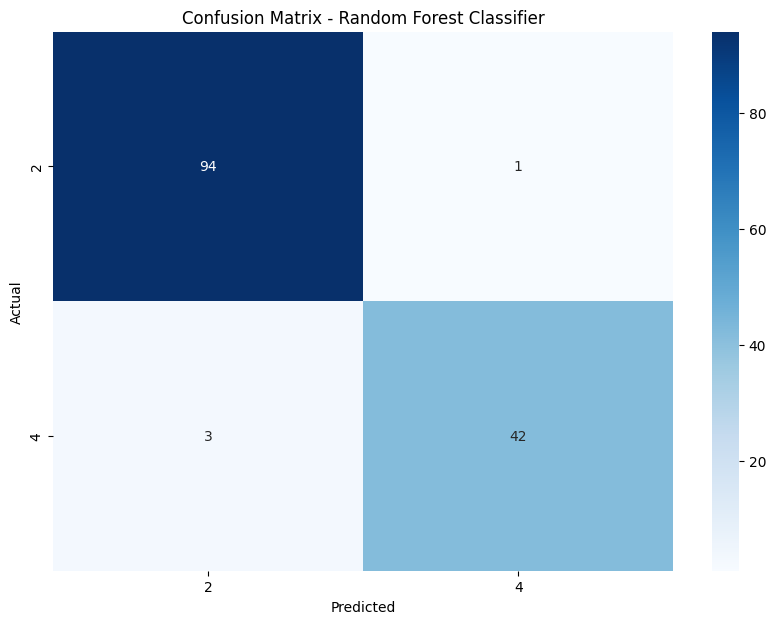

In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Instantiate the RandomForestClassifier with specified hyperparameters
rd_clf = RandomForestClassifier(criterion='entropy', max_depth=11, max_features='auto', min_samples_leaf=2, min_samples_split=3, n_estimators=130)

# Fit the model on the training data
rd_clf.fit(x_train, y_train)

# Predict the labels on the test set
y_pred_train = rd_clf.predict(x_train)
y_pred_test = rd_clf.predict(x_test)

# Calculate accuracy score for both training and test sets
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Generate and print the classification report
class_report = classification_report(y_test, y_pred_test)
print(f"Classification Report: \n{class_report}")

# Visualize the confusion matrix using seaborn
rd_clf_cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(10, 7))
sns.heatmap(rd_clf_cm, annot=True, fmt='d', cmap='Blues', xticklabels=rd_clf.classes_, yticklabels=rd_clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()

# **XGBoost Classifier**

Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        95
           1       0.93      0.89      0.91        45

    accuracy                           0.94       140
   macro avg       0.94      0.93      0.93       140
weighted avg       0.94      0.94      0.94       140



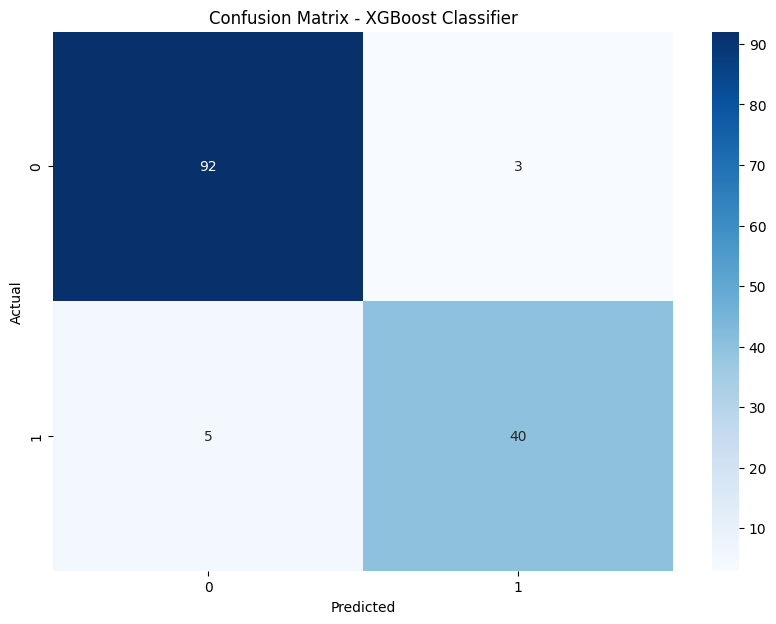

In [ ]:
# Import necessary libraries
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Contoh data, pastikan Anda sudah memiliki x_train, x_test, y_train, y_test

# Konversi label kelas 2 menjadi 0 dan 4 menjadi 1
y_train_converted = y_train.copy()
y_test_converted = y_test.copy()

y_train_converted[y_train == 2] = 0
y_train_converted[y_train == 4] = 1

y_test_converted[y_test == 2] = 0
y_test_converted[y_test == 4] = 1

# Instantiate the XGBClassifier
xgb = XGBClassifier(objective='binary:logistic', learning_rate=0.5, max_depth=5, n_estimators=150)

# Fit the model on the training data
xgb.fit(x_train, y_train_converted)

# Predict the labels on the training and test set
y_pred_train = xgb.predict(x_train)
y_pred_test = xgb.predict(x_test)

# Calculate accuracy score for both training and test sets
train_accuracy = accuracy_score(y_train_converted, y_pred_train)
test_accuracy = accuracy_score(y_test_converted, y_pred_test)

# Generate and print the classification report
class_report = classification_report(y_test_converted, y_pred_test)
print(f"Classification Report: \n{class_report}")

# Visualize the confusion matrix using seaborn
xgb_cm = confusion_matrix(y_test_converted, y_pred_test)
plt.figure(figsize=(10, 7))
sns.heatmap(xgb_cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost Classifier')
plt.show()

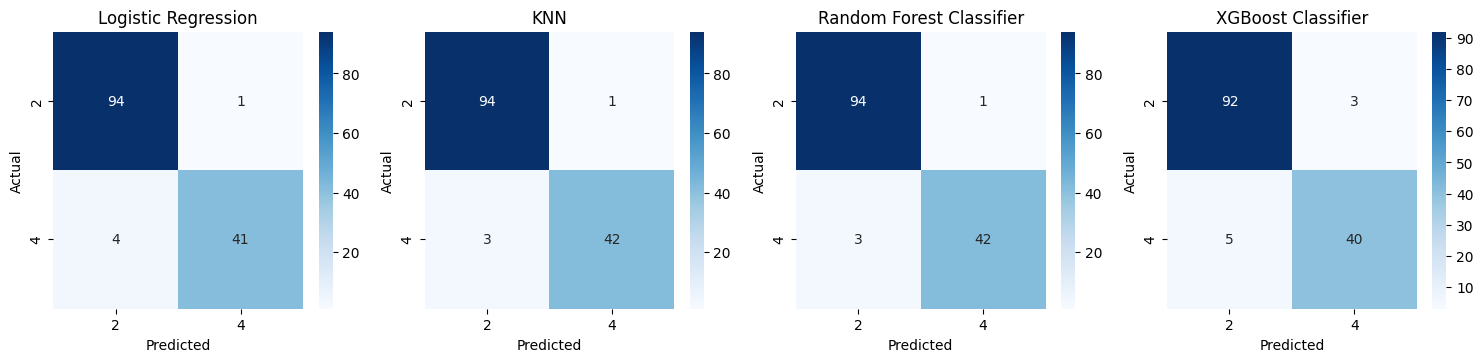

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

models = ['Logistic Regression', 'KNN', 'Random Forest Classifier', 'XGBoost Classifier']

conf_matrices = [dt_cm, knn_cm, rd_clf_cm, xgb_cm]

# Plotting the confusion matrices
plt.figure(figsize=(15, 10))
for i, (model, cm) in enumerate(zip(models, conf_matrices)):
    plt.subplot(3, 4, i + 1)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title(f'{model}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
plt.tight_layout()
plt.show()